In [1]:
import pandas as pd
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.compose import ColumnTransformer
import keras

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import os

import math


from tensorflow.keras.utils import Sequence
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import datetime as dt

import warnings
warnings.filterwarnings('ignore')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)  # turn off deprecation warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


2023-04-24 14:23:46.547229: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-24 14:23:47.016708: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-24 14:23:47.018742: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-24 14:23:48.719087: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Prepare Data


In [2]:
df = pd.read_csv('../../../data/latest_hour_final_ada.csv')

In [3]:
df

,Unnamed: 0,datetime,open,high,low,close,volume,close_time,qav,num_trades,...,macd,macd_diff,macd_signal,mi,sma,wma,stc,vi_pos,vi_neg,DATE
0,719,1612065600000,0.35982,0.36223,0.35850,0.36108,8867294.8,1612069199999,3.197565e+06,6379,...,0.009323,0.002069,0.007253,121.528331,0.351964,0.346690,99.998475,1.044513,0.961300,2021-01-31
1,720,1612069200000,0.36112,0.36116,0.35509,0.35756,14539762.3,1612072799999,5.200204e+06,9199,...,0.009206,0.001709,0.007497,121.415106,0.352217,0.346728,99.999237,1.033405,0.959307,2021-01-31
2,721,1612072800000,0.35750,0.35887,0.35537,0.35595,9714173.5,1612076399999,3.467982e+06,6615,...,0.009011,0.001325,0.007687,121.262170,0.352443,0.346757,49.999619,1.054651,0.962880,2021-01-31
3,722,1612076400000,0.35593,0.35993,0.35440,0.35605,16141914.5,1612079999999,5.760353e+06,9656,...,0.008828,0.000998,0.007829,121.118964,0.352705,0.346786,24.999809,1.045537,0.961455,2021-01-31
4,723,1612080000000,0.35597,0.35847,0.35300,0.35589,16108397.5,1612083599999,5.734942e+06,10401,...,0.008641,0.000711,0.007931,121.008679,0.352895,0.346813,12.499905,1.045535,0.959192,2021-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19425,20234,1682348400000,0.38980,0.39060,0.38530,0.38630,5602689.8,1682351999999,2.170127e+06,5271,...,-0.009556,0.000862,-0.010418,118.778613,0.390117,0.412824,99.006951,0.933661,1.032760,2023-04-24
19426,20235,1682352000000,0.38630,0.38800,0.38060,0.38180,6411740.6,1682355599999,2.467979e+06,6552,...,-0.009736,0.000597,-0.010333,118.902339,0.390037,0.412642,49.503475,0.923628,1.047733,2023-04-24
19427,20236,1682355600000,0.38170,0.38610,0.38000,0.38500,8468520.7,1682359199999,3.244859e+06,6643,...,-0.009738,0.000520,-0.010258,119.037727,0.389982,0.412478,24.751738,0.923254,1.041443,2023-04-24
19428,20237,1682359200000,0.38500,0.38800,0.38170,0.38320,3720628.3,1682362799999,1.431089e+06,4148,...,-0.009816,0.000387,-0.010203,119.208784,0.389940,0.412304,12.375869,0.932292,1.037202,2023-04-24


In [4]:

df.drop(columns=['Unnamed: 0','datetime','DATE'], inplace=True)
df

,open,high,low,close,volume,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,...,ichimoku_conversion_line,macd,macd_diff,macd_signal,mi,sma,wma,stc,vi_pos,vi_neg
0,0.35982,0.36223,0.35850,0.36108,8867294.8,1612069199999,3.197565e+06,6379,4045221.6,1.458687e+06,...,0.367625,0.009323,0.002069,0.007253,121.528331,0.351964,0.346690,99.998475,1.044513,0.961300
1,0.36112,0.36116,0.35509,0.35756,14539762.3,1612072799999,5.200204e+06,9199,6975854.8,2.494905e+06,...,0.366305,0.009206,0.001709,0.007497,121.415106,0.352217,0.346728,99.999237,1.033405,0.959307
2,0.35750,0.35887,0.35537,0.35595,9714173.5,1612076399999,3.467982e+06,6615,4731988.3,1.689141e+06,...,0.366305,0.009011,0.001325,0.007687,121.262170,0.352443,0.346757,49.999619,1.054651,0.962880
3,0.35593,0.35993,0.35440,0.35605,16141914.5,1612079999999,5.760353e+06,9656,7994801.2,2.854066e+06,...,0.365960,0.008828,0.000998,0.007829,121.118964,0.352705,0.346786,24.999809,1.045537,0.961455
4,0.35597,0.35847,0.35300,0.35589,16108397.5,1612083599999,5.734942e+06,10401,7093561.2,2.526879e+06,...,0.365260,0.008641,0.000711,0.007931,121.008679,0.352895,0.346813,12.499905,1.045535,0.959192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19425,0.38980,0.39060,0.38530,0.38630,5602689.8,1682351999999,2.170127e+06,5271,2919310.5,1.130586e+06,...,0.388000,-0.009556,0.000862,-0.010418,118.778613,0.390117,0.412824,99.006951,0.933661,1.032760
19426,0.38630,0.38800,0.38060,0.38180,6411740.6,1682355599999,2.467979e+06,6552,3202537.0,1.233088e+06,...,0.387350,-0.009736,0.000597,-0.010333,118.902339,0.390037,0.412642,49.503475,0.923628,1.047733
19427,0.38170,0.38610,0.38000,0.38500,8468520.7,1682359199999,3.244859e+06,6643,4279567.3,1.641234e+06,...,0.387050,-0.009738,0.000520,-0.010258,119.037727,0.389982,0.412478,24.751738,0.923254,1.041443
19428,0.38500,0.38800,0.38170,0.38320,3720628.3,1682362799999,1.431089e+06,4148,1638952.0,6.307198e+05,...,0.387050,-0.009816,0.000387,-0.010203,119.208784,0.389940,0.412304,12.375869,0.932292,1.037202


In [5]:
scaler = MinMaxScaler()


# Fit the scaler on your dataframe (let's say it's called df)
df_normalized = scaler.fit_transform(df)

# Convert the normalized data back to a dataframe
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)

In [6]:

# Convert the DataFrame to a NumPy array
raw_data = df_normalized.values
close = df_normalized['close'].values
close = close.reshape((len(close),1))
# Display the NumPy array
print(type(raw_data))
print(raw_data.shape)
print(close.shape)

<class 'numpy.ndarray'>
(19430, 72)
(19430, 1)


## Prepare Model

In [7]:
print('Prep Data')
num_train_samples = int(0.6 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)


Prep Data
num_train_samples: 11658
num_val_samples: 4857
num_test_samples: 2915


In [8]:
# Set Parameters

# delay: time in future that will be predicted
delay = 12


# sampling rate: period between timesteps within the sequence
# Sequence with rate=1 : t1,t2...tn
# Sequence with rate=3 : t1,t3...tn*3
sampling_rate = 1

# sequence length: sequence lenght of each sample
half_day = 1
sequence_length = 4 * 24


# sequence_stride: period between sequences
# First sequence starts at t0
# Second sequence will start at t1 with sequence_stride=1 or at t5 with sequence_stride=5
sequence_stride = 1

#batch_size: Number of timeseries samples in each batch (except maybe the last one). 
#If None, the data will not be batched (the dataset will yield individual samples).
# Huge impact in performance.
# Tip, should be multiple of 8
batch_size = 32

# Understanding our parameters
msg = f"The timeseries will consist of batches containing {batch_size} sequences of {sequence_length} samples."

msg += f"\nFinally our target is {delay} timesteps in the future, and will have data from {sequence_length * sampling_rate} timesteps in the past"
print(msg)

The timeseries will consist of batches containing 32 sequences of 96 samples.
Finally our target is 12 timesteps in the future, and will have data from 96 timesteps in the past


In [9]:
train_dataset = keras.preprocessing.timeseries_dataset_from_array(
                        raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False, # Shouldn't the shuffle be set to 0?
                    seed=33,
                    batch_size=batch_size,
                    start_index=0,
                    end_index=num_train_samples)

print("Done Train")

val_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples,
                    end_index=num_train_samples + num_val_samples)

print("Done Validation")      

test_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples + num_val_samples)

print("Done Test")

Done Train
Done Validation
Done Test


## Build and Train Model

In [10]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(32)(inputs)


outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("models/lstm",
   save_best_only=True) 
]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

history = model.fit(train_dataset,
                    epochs=30,
                    validation_data=val_dataset,
                    callbacks=callbacks)


Epoch 1/30


2023-04-24 14:23:52.283321: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:23:52.285023: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:23:52.286316: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - ETA: 0s - loss: 0.0044 - mae: 0.0479

2023-04-24 14:24:08.776870: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2023-04-24 14:24:08.778793: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [4857,72]
	 [[{{node Placeholder/_0}}]]
2023-04-24 14:24:09.153470: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype in

362/362 [==============================] - 23s 58ms/step - loss: 0.0044 - mae: 0.0479 - val_loss: 0.0034 - val_mae: 0.0507
Epoch 2/30
362/362 [==============================] - ETA: 0s - loss: 0.0015 - mae: 0.0291

2023-04-24 14:24:31.294990: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:24:31.296928: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:24:31.298410: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 20s 54ms/step - loss: 0.0015 - mae: 0.0291 - val_loss: 9.7813e-04 - val_mae: 0.0258
Epoch 3/30
361/362 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0265

2023-04-24 14:24:48.573029: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:24:48.575212: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:24:48.576753: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 17s 48ms/step - loss: 0.0013 - mae: 0.0265 - val_loss: 4.9378e-04 - val_mae: 0.0178
Epoch 4/30
361/362 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0252

2023-04-24 14:25:12.282010: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:25:12.284057: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:25:12.285497: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 21s 58ms/step - loss: 0.0012 - mae: 0.0252 - val_loss: 2.8425e-04 - val_mae: 0.0135
Epoch 5/30
361/362 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0238

2023-04-24 14:25:32.617601: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:25:32.619600: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:25:32.621064: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 21s 57ms/step - loss: 0.0011 - mae: 0.0238 - val_loss: 2.4436e-04 - val_mae: 0.0126
Epoch 6/30
361/362 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0231

2023-04-24 14:25:53.896692: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:25:53.898526: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:25:53.899948: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 21s 59ms/step - loss: 0.0010 - mae: 0.0231 - val_loss: 2.2231e-04 - val_mae: 0.0120
Epoch 7/30
362/362 [==============================] - 17s 47ms/step - loss: 9.7996e-04 - mae: 0.0224 - val_loss: 2.3980e-04 - val_mae: 0.0126
Epoch 8/30
362/362 [==============================] - ETA: 0s - loss: 9.3258e-04 - mae: 0.0219

2023-04-24 14:26:32.857500: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:26:32.859250: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:26:32.860698: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 21s 58ms/step - loss: 9.3258e-04 - mae: 0.0219 - val_loss: 1.8682e-04 - val_mae: 0.0110
Epoch 9/30
362/362 [==============================] - ETA: 0s - loss: 8.8823e-04 - mae: 0.0213

2023-04-24 14:26:53.449702: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:26:53.452092: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:26:53.453496: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 20s 56ms/step - loss: 8.8823e-04 - mae: 0.0213 - val_loss: 1.7320e-04 - val_mae: 0.0105
Epoch 10/30
361/362 [============================>.] - ETA: 0s - loss: 8.4366e-04 - mae: 0.0208

2023-04-24 14:27:13.856660: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:27:13.858574: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:27:13.860010: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 21s 57ms/step - loss: 8.4290e-04 - mae: 0.0207 - val_loss: 1.6332e-04 - val_mae: 0.0102
Epoch 11/30
361/362 [============================>.] - ETA: 0s - loss: 8.0539e-04 - mae: 0.0202

2023-04-24 14:27:34.441954: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:27:34.443708: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:27:34.445256: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 20s 56ms/step - loss: 8.0466e-04 - mae: 0.0202 - val_loss: 1.5415e-04 - val_mae: 0.0099
Epoch 12/30
361/362 [============================>.] - ETA: 0s - loss: 7.7066e-04 - mae: 0.0198

2023-04-24 14:27:54.572453: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:27:54.574244: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:27:54.575930: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 21s 57ms/step - loss: 7.6996e-04 - mae: 0.0198 - val_loss: 1.5007e-04 - val_mae: 0.0097
Epoch 13/30
362/362 [==============================] - 16s 45ms/step - loss: 7.3908e-04 - mae: 0.0193 - val_loss: 1.5123e-04 - val_mae: 0.0098
Epoch 14/30
362/362 [==============================] - 16s 45ms/step - loss: 7.1145e-04 - mae: 0.0189 - val_loss: 1.5737e-04 - val_mae: 0.0100
Epoch 15/30
362/362 [==============================] - 15s 42ms/step - loss: 6.8666e-04 - mae: 0.0186 - val_loss: 1.6776e-04 - val_mae: 0.0105
Epoch 16/30
362/362 [==============================] - 13s 37ms/step - loss: 6.6432e-04 - mae: 0.0182 - val_loss: 1.8137e-04 - val_mae: 0.0110
Epoch 17/30
362/362 [==============================] - 16s 44ms/step - loss: 6.4409e-04 - mae: 0.0179 - val_loss: 1.9654e-04 - val_mae: 0.0116
Epoch 18/30
362/362 [==============================] - 17s 47ms/step - loss: 6.2565e-04 - mae: 0.0176 - val_loss: 2.1160e-04 - val_mae: 0.0122
Epoch 19/30

In [11]:
# Save the trained model to a file
model.save('lstm_model_1.h5')

## Understanding the Model

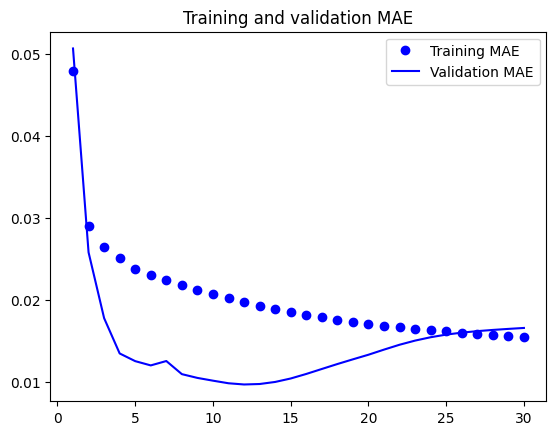

In [12]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

## Looking at the data

In [13]:
pred_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=1,
                    sequence_stride=1,
                    sequence_length=180,
                    shuffle=False, # Shouldn't the shuffle be set to 0?
                    seed=33,
                    batch_size=32,
                    start_index=num_train_samples,
                    end_index=num_train_samples + num_val_samples
                    )




In [14]:


predictions = model.predict(pred_dataset)

2023-04-24 14:32:58.365465: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [4678]
	 [[{{node Placeholder/_28}}]]
2023-04-24 14:32:58.366195: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [4857,72]
	 [[{{node Placeholder/_0}}]]


  1/147 [..............................] - ETA: 1:10

2023-04-24 14:32:58.682031: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:32:58.684145: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:32:58.685720: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

147/147 [==============================] - 3s 19ms/step


In [15]:
len(close[num_train_samples+180:num_train_samples + num_val_samples+1])

4678

In [16]:
len(predictions)

4678

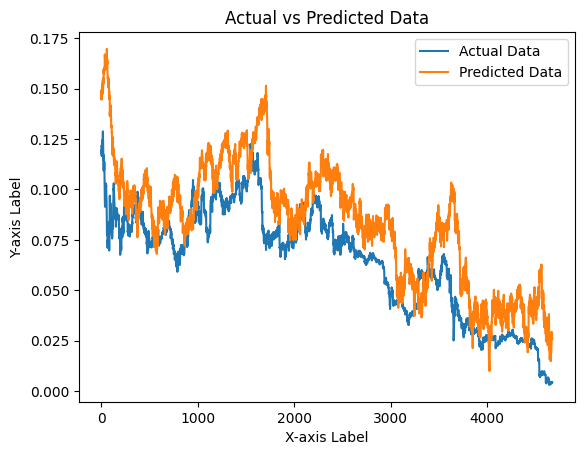

In [17]:
# Generate the predictions using your model and store it in a variable called 'predictions'

# Plot the actual data
plt.plot(range(len(predictions)), close[num_train_samples+180:num_train_samples + num_val_samples+1], label='Actual Data')

# Plot the predicted data
plt.plot(range(len(predictions)), predictions, label='Predicted Data')

# Add labels, title, and legend
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Actual vs Predicted Data')
plt.legend()

# Display the plot
plt.show()

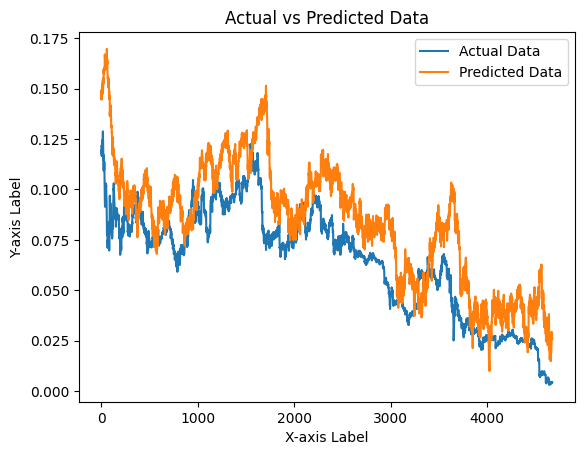

In [18]:
# Generate the predictions using your model and store it in a variable called 'predictions'


actual = close[num_train_samples+180:num_train_samples + num_val_samples+1]

# Plot the actual data
plt.plot(range(len(actual[0:24*5*60])), actual[0:24*5*60], label='Actual Data')

# Plot the predicted data
plt.plot(range(len(actual[0:24*5*60])), predictions[0:24*5*60], label='Predicted Data')

# Add labels, title, and legend
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Actual vs Predicted Data')
plt.legend()

# Display the plot
plt.show()

# BTC